# Machine Learning - USA_Housing

### van: Mart Veldkamp

# Inhoudsopgave

1. Inleiding
2. Het probleem
3. Library's laden + data ophalen
4. Data visualiseren
    - Distributies
    - Features tov. target vector
    - Normaalverdeling
5. Data voorbereiden & opschonen
    - Waardes verranderen
    - Array aanpassen
    - Data opsplitsen
6. Modellen selecteren
    - Linear regressie
    - Decision tree (regressie)
7. Modellen trainen en testen
    - Modellen trainen
    - Modellen testen
    - coefficienten en intercept
    - de accuracy, precision, recall en f1
    - Confusion matrix
    - ROC/AUC -curve
8. Conclusie
    - Correlatie matrix
- Bronnen

# 1. Inleiding
Deze opdracht is onderdeel van het overkoepelende vak Machine Learning, dit is één van de meerdere datasets die ik gebruik in dit vak, per dataset zijn ten minste 2 verschillende classifiers gebruikt. Deze 6 opdrachten bestaan uit classificatie- en regressieproblemen. En zijn allemaal op een andere manier opgelost.

Alle code in deze opdrachten zijn van mijzelf, gebasseerd op code uit de lessen, of waar ik zelf vast liep gebaseerd op code snippets van het internet. Mocht het toch voorkomen dat er code 1 op 1 is overgenomen, dan staat dit vermeld in de bronnen

# 2. Het probleem

Het probleem dat ik in deze notebook ga behandelen is het bepalen van een Prijs in de USA ten opzichte van feutures van het huis. Onder andere hoe veel de algeme inkomst van de buurt is, en de hoeveelheid kamers in het huis.

Dit probleem is een regressie probleem, omdat je bij het bepalen van geld meestal niet een classificatie kan trekken. Maar eerder een getal moet voorspellen aan de hand van feutures.

# 3. Library's laden + data ophalen

Deze dataset is afkomstig van kaggle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import statsmodels.api as sm
import math 
import sklearn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from random import sample
%matplotlib inline 

In [3]:
data = pd.read_csv('USA_Housing.csv')

print(f'De dataset heeft {data.shape[0]} rijen, en {data.shape[1]} kolommen')
print('\nDit zijn de features/target')
print(data.dtypes)

print('\nHier een kleine sample van de dataset')
data.head()

De dataset heeft 5000 rijen, en 7 kolommen

Dit zijn de features/target
Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

Hier een kleine sample van de dataset


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Het belangrijkste wat je hier kan zien is dat de Avg. Area Income langer is dan 2 decimalen na de 0.0, dit had ik zelf niet verwacht maar zal hoogswarscheinlijk kloppen. Verder is deze dataset 5000 rows × 7 columns groot. Dit is gemiddeld groot.

Verder wil ik nog in gaan op de kollomen en waar ze allemaal voor staan:

# 4. Data visualiseren

In [4]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

De kolommen worden als volgt geïnterpreteerd:
- Avg. Area Income: Het gemiddelde inkom van de personen die in het gebied van het huis wonen.
- Avg. Area House Age: De gemiddelde leeftijd van het huis.
- Avg. Area Number of Rooms: Het gemiddelde nummer kamers van het huis.
- Avg. Area Number of Bedrooms: Het gemiddelde nummer badkamers wat het huis heeft.
- Area Population: De populatie ik het gebied waar het huis staat.
- Price: Dit is de prijs van het huis, dit wordt onze target feuture. 
- Address: Dit is het adress van het huis, voor ons minder interresant.

Daarnaast klinkt het wel alsof alles een beetje met elkaar correleert. Laten we kijken in een scatter matrix of dit echt het geval is, en of er bijzondere waardes van de data zijn:

## Distributies

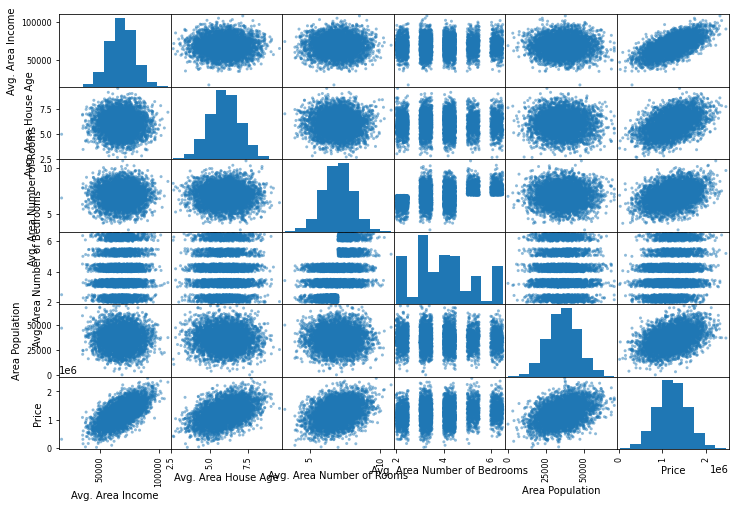

In [5]:
attributes = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']
scatter_matrix(data[attributes], figsize = (12, 8))
plt.show()

Wat je kan zien is dat er bij veel van de feutures toch weinig correlatie zit, het bijzonderste wat mij opviel is de correlatie tussen te prijs en de Avg. Area Income. Dit zou eventueel wel een _Linear regressie_ kunnen zijn.

Verder lijken alle features alsof het een _normaal verdeling_ heeft. Dit kunnen we verder uitzoeken:

## Normaalverdeling

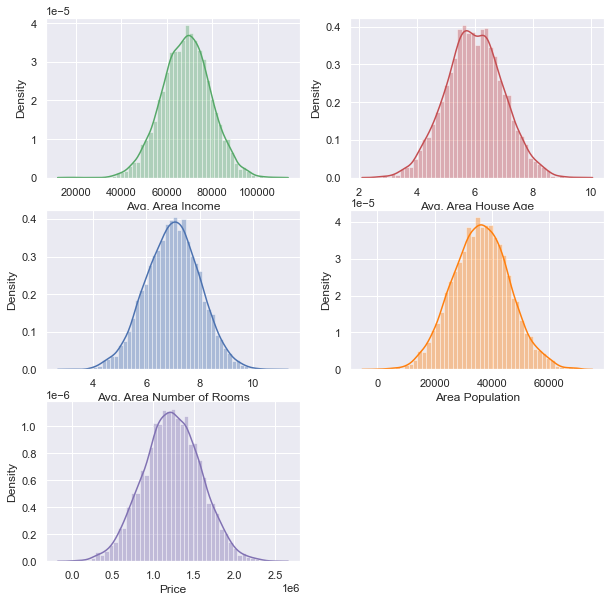

In [6]:
sns.set_theme()

plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(data['Avg. Area Income'], kde=True, color='g')

plt.subplot(3,2,2)
sns.distplot(data['Avg. Area House Age'], kde=True, color='r')

plt.subplot(3,2,3)
sns.distplot(data['Avg. Area Number of Rooms'], kde=True, color='b')

plt.subplot(3,2,4)
sns.distplot(data['Area Population'], kde=True, color='tab:orange')

plt.subplot(3,2,5)
sns.distplot(data['Price'], kde=True, color='m');

Ik zou elk van deze features een normaal verdeling vinden.

# 5. Data voorbereiden & opschonen

## waardes verranderen

Om te controleren of elke kolom gevuld is kan het onderstaande gebruikt worden.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Zoals je kan zien zijn alle waardes in orde. Hier hoeft geen verdere aanpassingen aan gemaakt te worden.

## Array aanpassen

In [8]:
x = data.drop['Avg. Area Income'].values.reshape((-1,1))

## Data opsplitsen

In [9]:
x_data = x
y_data = data['Price']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

# 6. Modellen selecteren & instellen

voor deze opdracht zullen 2 modellen gebruikt worden:
- Linear regressie
- Decision tree (Regressie)

ik weet dat Linear regressie wordt gebruikt voor snelheid dus ik ga er van uit dat Linear regressie de snellere van de 2 zal zijn, terwijl Decision tree de accuratere zal zijn.

# 7. Modellen trainen en testen

## Linear regressie

### Train en test het model

In [10]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

lr_pred = lr_model.predict(x_test)

### bereken R^2

In [11]:
score = lr_model.score(x_test, y_test)
print(score)

0.39694865192619766


Dit is een erg lage accuracy, ik weet niet zeker hoe dit komt. Misschien ligt het aan het feit dat we te weinig data hebben, of dat er toch blijkbaar weinig correlatie is tussen de prijs en Avg. Erea Income.


### Scatterplot maken

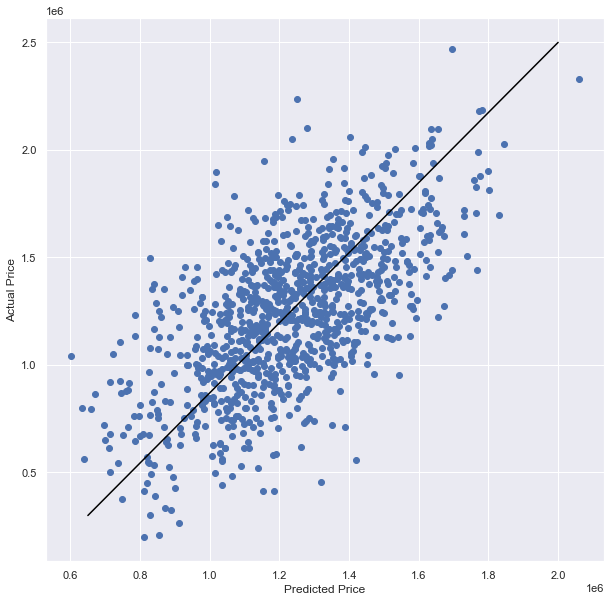

In [12]:
plt.figure(figsize=(10,10))
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.scatter(lr_pred, y_test)
p = 1000000
plt.plot([0.65*p,2*p], [0.3*p,2.5*p], linestyle='-', color='black')

Zoals je kan zien is mijn Linear regressie model niet heel accuraat, dit kan mede komen omdat een kleine vergissing al snel een groot getal is. Dit komt omdat het tabel *10^6 is. Dus we praten hier over grote getallen. Wat logisch is aangezien we over huizen praten.

## Decision tree regression

### Train en test het model

In [16]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor(random_state = 42)
dtr_model.fit(x_train, y_train)

dtr_pred = dtr_model.predict(x_test)

### Berekenen R^2

In [14]:
score = dtr_model.score(x_test, y_test)
print(score)

-0.14105886910884613


### Scatterplot maken

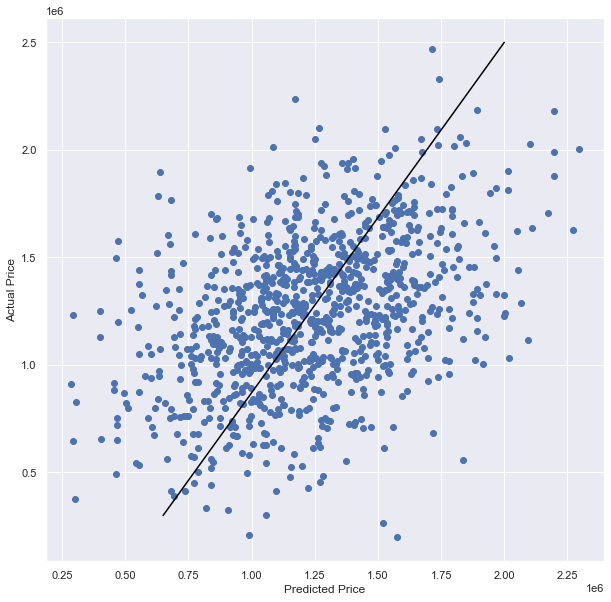

In [20]:
plt.figure(figsize=(10,10))
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.scatter(dtr_pred, y_test)
p = 1000000
plt.plot([0.65*p,2*p], [0.3*p,2.5*p], linestyle='-', color='black')

Zoals je hier kan zien is de Decision tree regression niet goed in het vinden van de juiste Prijs van de gegeven huis. Dit is tegen mijn verwachting in aangezien er in de correlatiematrix aangegeven was dat er eventueel toch wel een goeie correlatie tussen prijs en Avg. Erea income zou zitten, dus ook een goede waarde kon voorspellen. Maar dat is niet het geval.

# 8. Conclusie

## Correlatie matrix

Bij een correlatiematrix wordt de Pearson's T gebruikt. Dit correlatiecoëfficient zegt iets over twee features; als er een hoge positieve correlatie ism dat dan als het gemiddelde van ene omhoog gaat, dat de andere dan ook omhoog gaat, of juist allebei omlaag. Bij een negatieve correlatie gaat het juist andersom, dit houdt in dat als de ene omhoog gaat, de andere juist omlaag gaat. Bijvoorbeeld bij het wachten op de trein en algeme ervaring; Hoe langer iemand wacht (omhoog), hoe slechter de algemene ervaring (omlaag).

<AxesSubplot:>

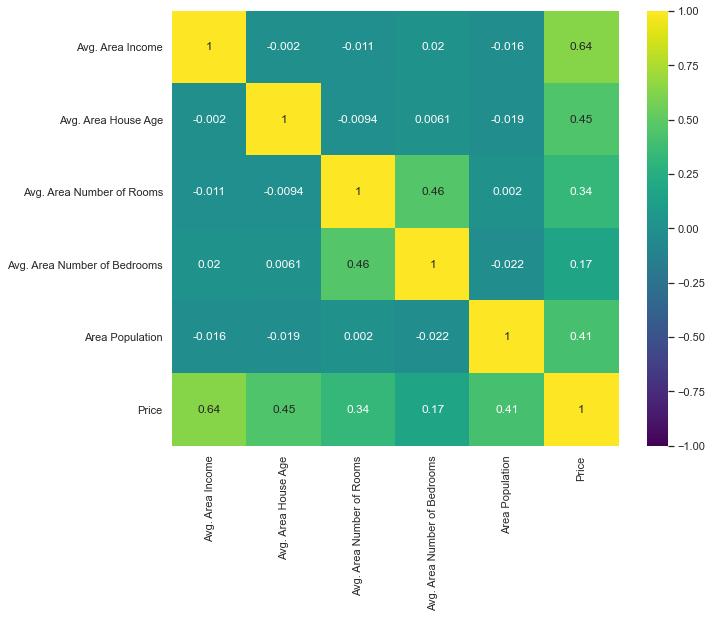

In [22]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='viridis', vmin=-1, vmax=1)

Zo een correlatie matrix is erg fijn om conclusies uit te trekken ter herkenning dat de dataset klopt. Een goed voorbeeld hiervan is het verband tussen de Avg. Area number of Rooms ten opzichte van Avg. Area Number of Bedrooms. Het is natuurlijk logisch dat als er meer slaapkamers komen, er in totaal ook meer kamers in het algemeen komen.

Hier kan je ook mooi in zien dat de Avg. Erea Income en Prijs het beste met elkaar correleert. Zoals verwacht, alleen blijkbaar niet genoeg correleert dat het gebasseerd op dat Avg. Area Income een goeie voorspelling kan maken van de Prijs.

## Conclusie Linear regressie vs Decision tree regressie

Mijn conlusie is dat Linear regressie toch beter is Decision tree, dit kan komen omdat Decision tree vaak wordt gebruikt voor snellere toepassingen terwijl Linear regressie naast snelheid ook wel accuraat kan zijn.